# Solving the Incompressible Semi-Geostrophic Problem in 2D

First load in the neccessary packages and paths.

In [1]:
import initialconditions as ic
import matplotlib.pyplot as plt

import main as main
import sys
sys.path.append("/home/s2250115/petsc/arch-linux-c-debug/lib")

import animators as ani

Now set up the initial condition and visualize it.

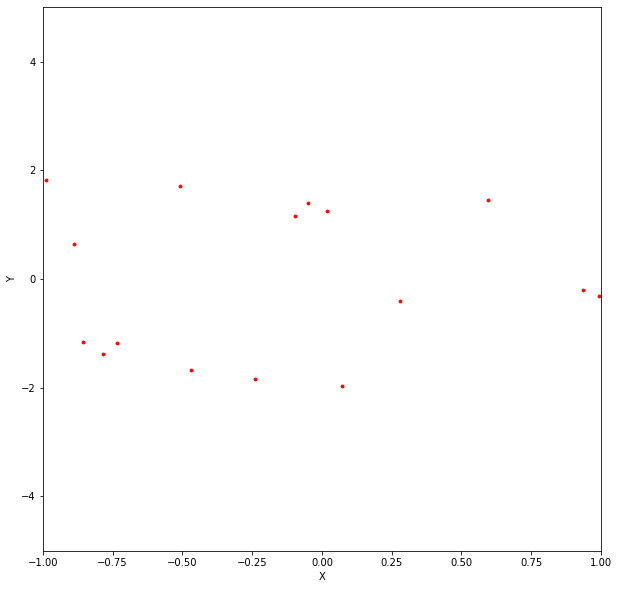

In [2]:
# Define the parameters of the system
N = 16 #Number of seeds
box = [-1, -2, 1, 2] #list or tuple defining domain [xmin, ymin, xmax, ymax]
per_tol = 1e-3 #Percent tolerance
periodic_x = False # Set the periodicity of X
periodic_y = True # Set the periodicity of Y
a = 2 # Set the replication parameter
tf = 10 #Final time
Ndt = 1000 #Number of timesteps

#Initialize initial condition
Z = ic.create_initial(N, -1, -2, 1, 2, 'uniform') 

#Plot the initial condition

fig = plt.figure()
fig.set_size_inches(10, 10, True)
ax = fig.add_subplot()
ax.scatter(Z[:,0], Z[:,1], color= 'red', s = 8)
ax.set_xlim([-1, 1])
ax.set_ylim([-5, 5])
ax.set_xlabel('X')
ax.set_ylabel('Y')

plt.show()

Solve the problem and save the data

In [ ]:
main.SG_solver(box, Z, N, per_tol, tf, Ndt, periodic_x, periodic_y, a) #Solve and save the solution

Mass before Damped Newton [0.5365809  0.20417628 0.37519046 0.12227499 0.38131292 0.57967933
 0.40956547 0.16446429 0.22232252 0.20510846 0.13833734 0.07072837
 0.44174959 0.52372341 0.20756505 0.06467359] Total: 4.647452978753448
Mass after Damped Newton [0.55833513 0.25       0.25       0.25       0.25       0.25
 0.25       0.25       0.25       0.25       0.25       0.25
 0.25       0.25       0.25       0.25      ] Total: 4.308335129946348
0
Mass before Damped Newton [0.53808513 0.21208063 0.38703017 0.12310718 0.38735741 0.58376284
 0.41628515 0.15952429 0.22492812 0.21114883 0.12748883 0.06791568
 0.4286136  0.53441353 0.21435384 0.04636041] Total: 4.66245561843332
Mass after Damped Newton [0.57456218 0.25       0.25       0.25       0.25       0.25
 0.25       0.25       0.25       0.25       0.25       0.25
 0.25       0.25       0.25       0.25      ] Total: 4.324562184537028
1
Mass before Damped Newton [0.53899793 0.22042202 0.39907887 0.11678158 0.39339049 0.58778157
 0.422

: 

: 

Animate the solutions

In [ ]:
ani.point_animator('./SG_data.npz', 'C', tf) #Animate the seeds or centroids depending on choice of 'Z' or 'C' 
ani.point_animator('./SG_data.npz', 'Z', tf) #Animate the seeds or centroids depending on choice of 'Z' or 'C' 
#ani.cell_animator('./SG_data.npz', box)

# Code for experimenting with impelementing periodicity

In [ ]:
import scipy.io
import numpy as np

initialdata = scipy.io.loadmat('test_case.mat')

Z_test_1 = initialdata['Z_test'][:,:,0]
Z_test_2 = initialdata['Z_test'][:,:,1]
Z_test_3 = initialdata['Z_test'][:,:,2]
amp = initialdata['amp'][0][0]
bx = initialdata['bx'][0]
f = initialdata['f'][0][0]
g = initialdata['g'][0][0]
M = initialdata['M']
Nsq = initialdata['Nsq'][0][0]
s = initialdata['s'][0][0]
th0 = initialdata['th0'][0][0]
w_test_1 = initialdata['w_test'][:,0]
w_test_2 = initialdata['w_test'][:,1]
w_test_3 = initialdata['w_test'][:,2]

In [ ]:
from pysdot.domain_types import ConvexPolyhedraAssembly
from pysdot import OptimalTransport
from pysdot import PowerDiagram
import numpy as np
import pyvista as pv
import weightguess as wg

nb_diracs = 2678

positions = Z_test_2
masses =  M[0]

domain = ConvexPolyhedraAssembly()
domain.add_box([bx[0], bx[1]], [bx[2], bx[3]])
box = bx
psi = np.zeros(shape = (nb_diracs,))

# we have to specify that dirac masses because by default, sdot takes ones * measure( domain ) / nb_diracs
# and that's not what we want in this case
w0 = w_test_2
ot = OptimalTransport( positions = positions, domain = domain, masses = masses, weights = w0 )

# first arg of add_replication is a translation
#for x in [ -1, 1 ]:
#    ot.pd.add_replication( [ x, 0 ] )

ot.adjust_weights()

filename = 'pb.vtk'
ot.pd.display_vtk( 'pb.vtk' )

In [ ]:
# Mass of cells
vols=ot.pd.integrals()
print(sum(vols))
print(vols)

# Read the data
grid=pv.read(filename)

# create cell data that gives the cell volumes, this allows us to colour by cell volumes
cell_vols = vols[grid.cell_data['num'].astype(int)]
grid.cell_data['vols']=cell_vols

# plot the data with an automatically created plotter, for a static picture use backend='static'
plotter = pv.Plotter(window_size=[800,800], notebook = True, off_screen=False)
plotter.add_mesh(grid)

# Render the frame
plotter.show()

In [ ]:
import matplotlib.pyplot as plt

#Plot the initial condition

fig = plt.figure()
fig.set_size_inches(10, 10, True)
ax = fig.add_subplot()
ax.scatter(Z_test_3[:,0], Z_test_3[:,1], color= 'red', s = 8)
ax.set_xlim([-1000000, 1000000])
ax.set_ylim([-3000000, 30000000])
ax.set_xlabel('X')
ax.set_ylabel('Y')

plt.show()

In [ ]:
print(bx)